<a href="https://colab.research.google.com/github/LeslyVictoria2/CSST-104---ADVANCED-MACHINE-LEARNING/blob/main/3B_VICTORIA_MIDTERM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSST 104 - ADVANCED MACHINE LEARNING**

**LESLY-ANN B. VICTORIA from BSCS-IS-3B - MIDTERM EXAMINATION**

**"Forecasting with ARIMA Model"**

**Importing Libraries:**

In [ ]:
import pandas as pd #Data Manupilation
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns #Data Visualization
from sklearn.model_selection import train_test_split #Selection
from sklearn.linear_model import LinearRegression #Training Data Modeling
from sklearn.metrics import mean_squared_error #Data Metrics
from sklearn.preprocessing import OneHotEncoder #Data Preprocessing
from sklearn.compose import ColumnTransformer #Data Transformation
from sklearn.impute import SimpleImputer #Missing Values Handling

**1. Data Cleaning and Preparation**

In [ ]:
#Data Loading
dt = pd.read_csv('googleplaystore.csv')
print("Number of Missing Values:")
print(dt.isnull().sum())
print("\nNumber of Duplicates:", dt.duplicated().sum())

#Handle Missing Values
dt = dt.dropna()

#Remove Duplicates
dt = dt.drop_duplicates()

#Convert fields to Numerical Format
dt['Reviews'] = pd.to_numeric(dt['Reviews'], errors='coerce')
dt['Size'] = dt['Size'].str.replace('M', '').str.replace('k', '').str.replace(',', '')
dt['Installs'] = dt['Installs'].str.replace('+', '').str.replace(',', '').astype(float)
dt['Price'] = dt['Price'].str.replace('$', '').astype(float)

print(dt)

Number of Missing Values:
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Number of Duplicates: 483
                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator            

**2. Exploratory Data Analysis (EDA)**

Data Statistics:
            Rating       Reviews      Installs        Price
count  8886.000000  8.886000e+03  8.886000e+03  8886.000000
mean      4.187959  4.730928e+05  1.650061e+07     0.963526
std       0.522428  2.906007e+06  8.640413e+07    16.194792
min       1.000000  1.000000e+00  1.000000e+00     0.000000
25%       4.000000  1.640000e+02  1.000000e+04     0.000000
50%       4.300000  4.723000e+03  5.000000e+05     0.000000
75%       4.500000  7.131325e+04  5.000000e+06     0.000000
max       5.000000  7.815831e+07  1.000000e+09   400.000000 

Data Visualization:


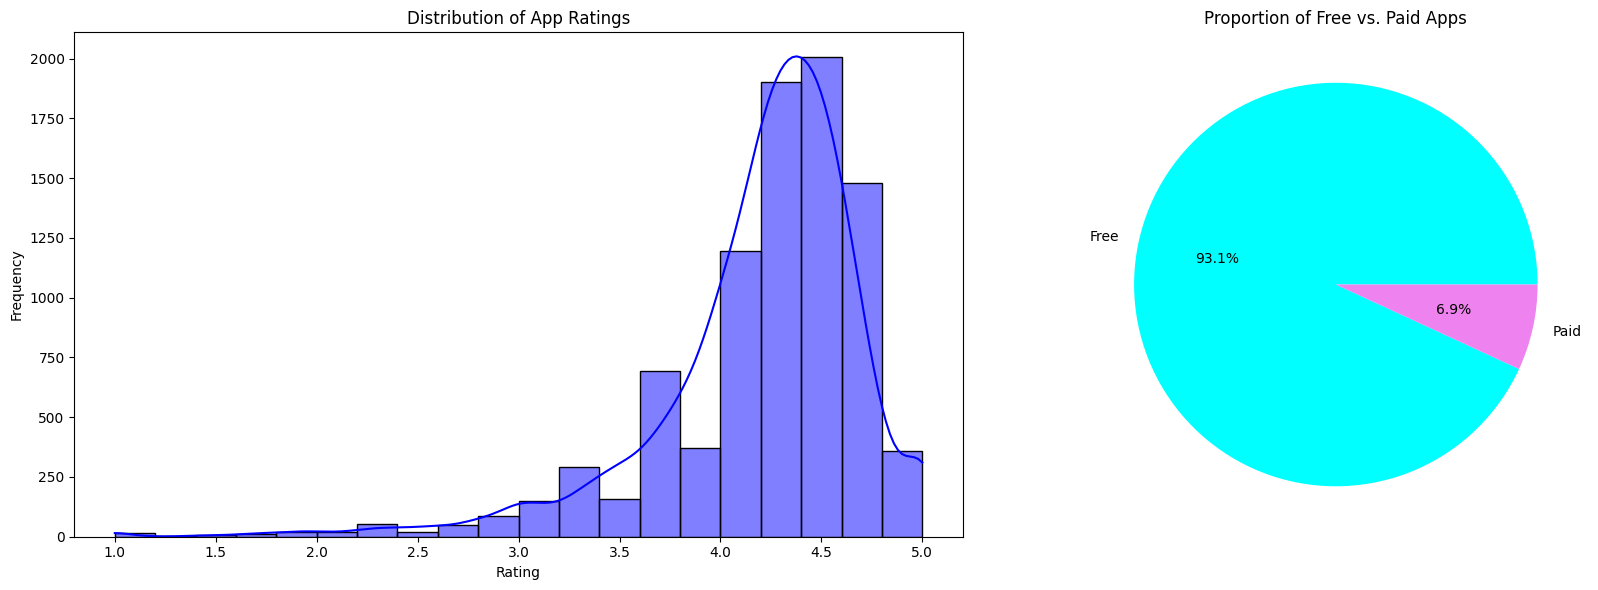

<ipython-input-34-ac07b09f124a>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='magma')


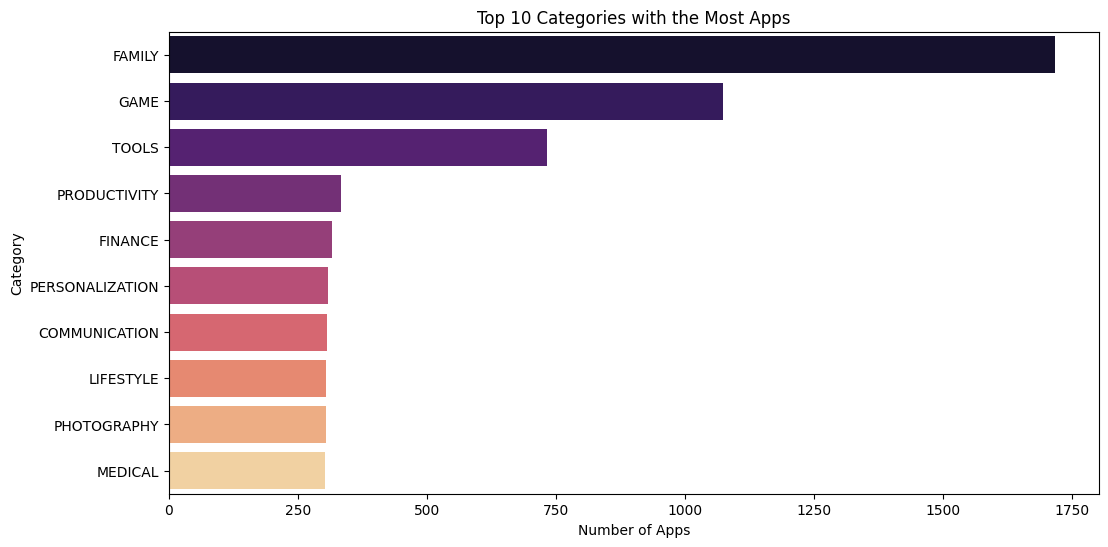

In [ ]:
#Describe Statistics
statistics = dt.describe()
print('Data Statistics:')
print(statistics, '\n')

#Distribution of App Ratings
print('Data Visualization:')
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(ax=axes[0], data=dt, x='Rating', bins=20, kde=True, color='blue')
axes[0].set_title('Distribution of App Ratings')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Frequency')

#Proportion of Free vs. Paid Apps
dt['Type'].value_counts().plot(ax=axes[1], kind='pie', autopct='%1.1f%%', colors=['cyan', 'violet'])
axes[1].set_title('Proportion of Free vs. Paid Apps')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

#Categories with the Most Apps
plt.figure(figsize=(12, 6))
top_categories = dt['Category'].value_counts().nlargest(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='magma')
plt.title('Top 10 Categories with the Most Apps')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

**3. Category Analysis**

Category with the Highest Average Rating: EVENTS
Category with the Most Reviews: GAME
Category with the Most Apps: FAMILY


<ipython-input-37-754cd1584a0e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Size', data=dt, palette='plasma')


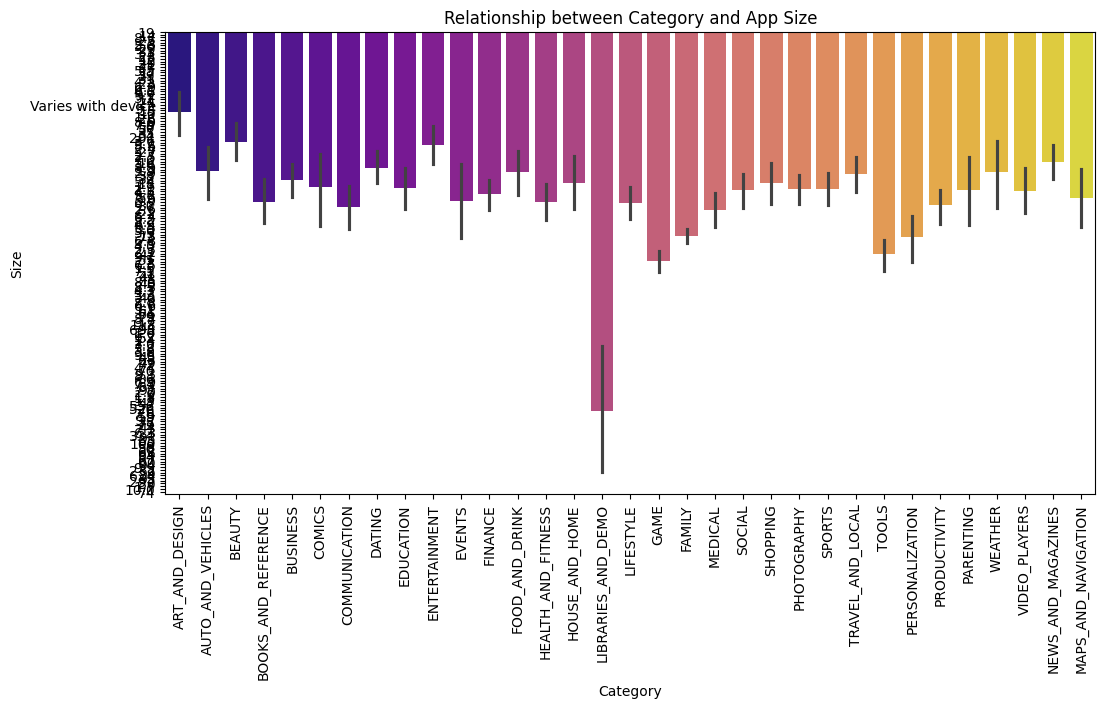

<ipython-input-37-754cd1584a0e>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Price', data=dt, palette='plasma')


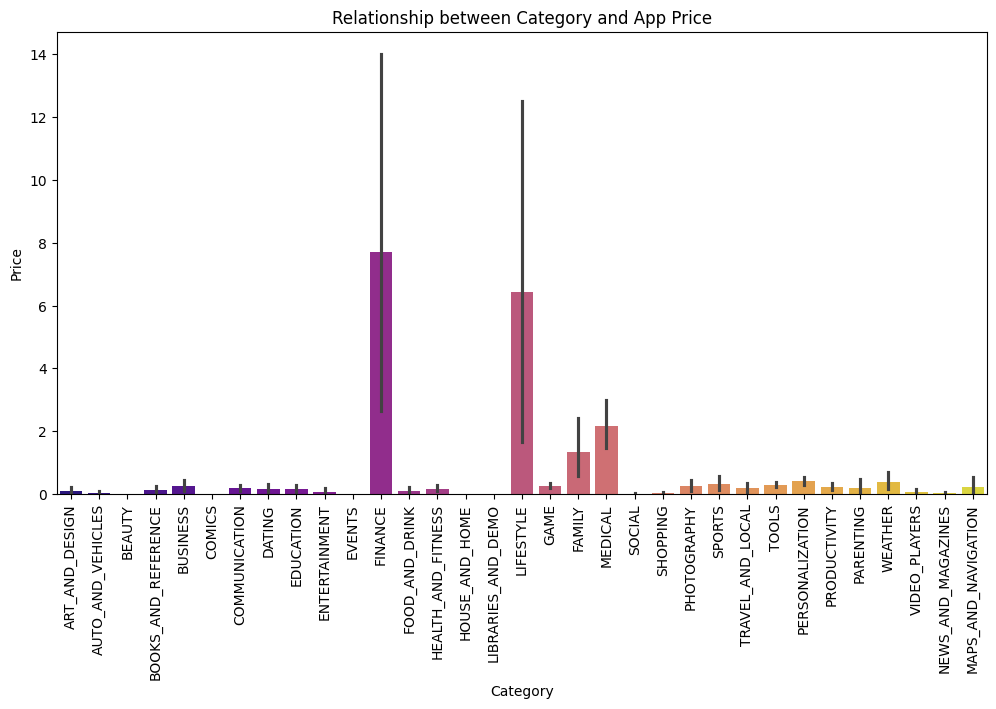

In [ ]:
#Category
avg_rating_by_category = dt.groupby('Category')['Rating'].mean().sort_values(ascending=False)
highest_rating_category = avg_rating_by_category.idxmax()
most_reviews_by_category = dt.groupby('Category')['Reviews'].sum().sort_values(ascending=False)
most_reviews_category = most_reviews_by_category.idxmax()
num_apps_by_category = dt['Category'].value_counts()
most_apps_category = num_apps_by_category.idxmax()
print("Category with the Highest Average Rating:", highest_rating_category)
print("Category with the Most Reviews:", most_reviews_category)
print("Category with the Most Apps:", most_apps_category)

#Relationship between Category and Size
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Size', data=dt, palette='plasma')
plt.title('Relationship between Category and App Size')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Size')
plt.show()
#Relationship between Category and Price
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Price', data=dt, palette='plasma')
plt.title('Relationship between Category and App Price')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

**4. Rating Prediction Model**

In [ ]:
#Features List
features = ['Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating']
dt_model = dt.dropna(subset=features)
dt_model['Size'] = dt_model['Size'].replace('Varies with device', None)
dt_model['Size'] = dt_model['Size'].str.replace('M', '').astype(float)

#Target Variables
X = dt_model[features]
y = dt_model['Rating']

#Categorical Variables
categorical_cols = ['Type', 'Content Rating']
ct = ColumnTransformer(
    [('encoder', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)
X_encoded = ct.fit_transform(X)

#Impute Missing Values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_encoded)

#Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

#Initializing and Fitting the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

#Making Prediction
y_pred = model.predict(X_test)

#Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

#Predicting the Rating of the New App
new_app = [[10000, 20, 1000000, 'Free', 4.99, 'Everyone']]
new_app_df = pd.DataFrame(new_app, columns=features)
new_app_fe = ct.transform(new_app_df)
predicted_rating = model.predict(new_app_fe)
print(f"Predicted Rating for the New App: {predicted_rating[0]:.2f}")

Mean Squared Error: 0.27
Predicted Rating for the New App: 4.17


**5. Trend Analysis**

Time Series Analysis:


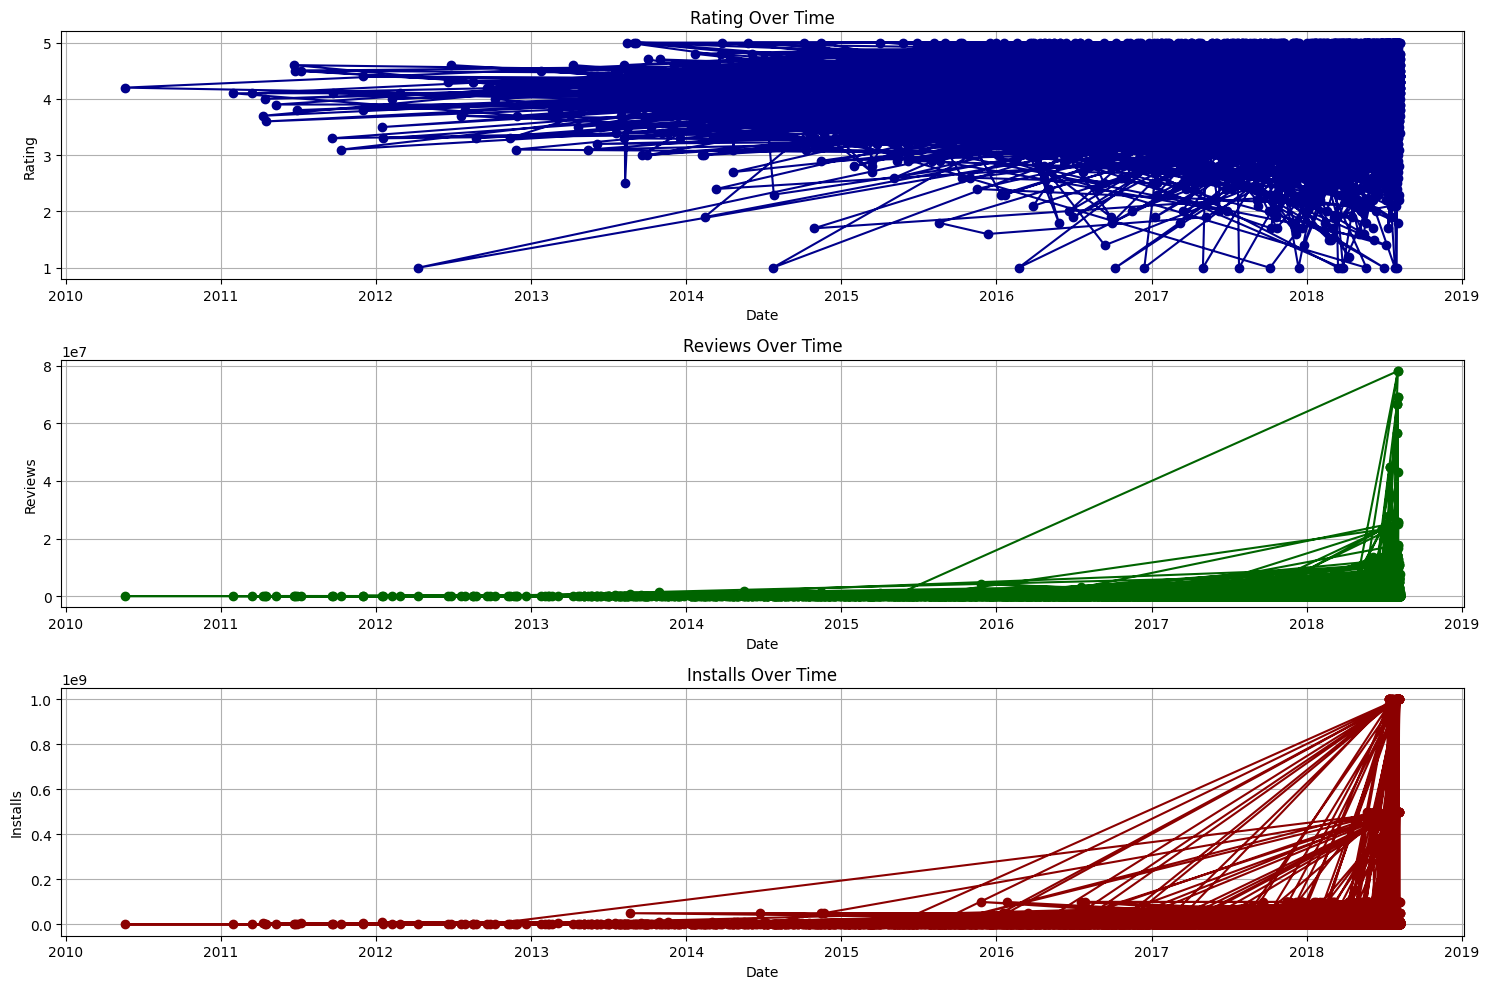

Trend Visualization:


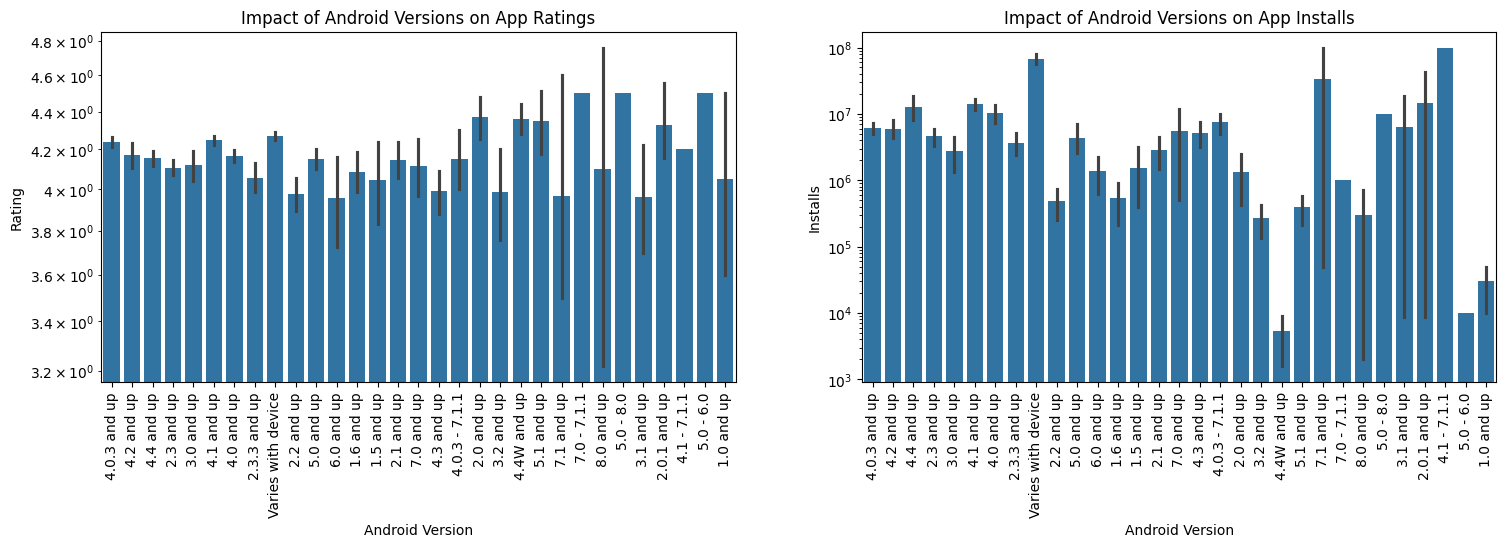

In [ ]:
#Convert Last Updated to DateTime
dt['Last Updated'] = pd.to_datetime(dt['Last Updated'])
plt.figure(figsize=(15, 10))

print('Time Series Analysis:')
#Rating
plt.subplot(3, 1, 1)
plt.plot(dt['Last Updated'], dt['Rating'], marker='o', linestyle='-', color='darkblue')
plt.title('Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.grid(True)
#Reviews
plt.subplot(3, 1, 2)
plt.plot(dt['Last Updated'], dt['Reviews'], marker='o', linestyle='-', color='darkgreen')
plt.title('Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Reviews')
plt.grid(True)
#Installs
plt.subplot(3, 1, 3)
plt.plot(dt['Last Updated'], dt['Installs'], marker='o', linestyle='-', color='darkred')
plt.title('Installs Over Time')
plt.xlabel('Date')
plt.ylabel('Installs')
plt.grid(True)
plt.tight_layout()
plt.show()

print('Trend Visualization:')
#Impact of Android versions on app ratings
plt.figure(figsize=(18, 10))
plt.subplot(2, 2, 1)
sns.barplot(x='Android Ver', y='Rating', data=dt)
plt.title('Impact of Android Versions on App Ratings')
plt.xlabel('Android Version')
plt.ylabel('Rating')
plt.yscale('log')
plt.xticks(rotation=90)
#Impact of Android versions on app installs
plt.subplot(2, 2, 2)
sns.barplot(x='Android Ver', y='Installs', data=dt)
plt.title('Impact of Android Versions on App Installs')
plt.xlabel('Android Version')
plt.ylabel('Installs')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

**6. Impact of Reviews on Ratings**

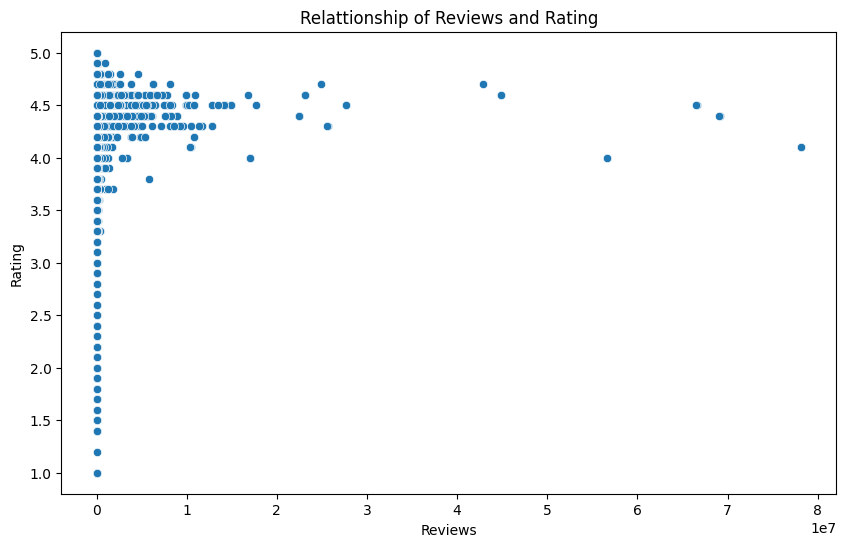


Correlation Coefficient between Reviews and Rating: 0.06872388127364139


In [ ]:
#Scatter plot of Reviews vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reviews', y='Rating', data=dt)
plt.title('Relattionship of Reviews and Rating')
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.show()

#Calculate the Correlation Coefficient between Reviews and Rating
correlation = dt['Reviews'].corr(dt['Rating'])
print("\nCorrelation Coefficient between Reviews and Rating:", correlation)